# 데이터 준비

In [2]:
import pandas as pd
import os
!pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline
CURRENT_DIR = os.getcwd()
file_path = os.path.join(CURRENT_DIR, "Data", "train.csv")
save_path = os.path.join(CURRENT_DIR, "Result", "preprocessed_train.csv")  

print("현재 작업 디렉토리:", CURRENT_DIR)

df = None

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    print(f"🚨 파일을 찾을 수 없습니다! 경로를 확인하세요: {file_path}")
    raise FileNotFoundError(f"파일이 없습니다: {file_path}")

현재 작업 디렉토리: C:\Users\82108\중고차


In [3]:
!pip install xlrd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,44925464,14113,1185,FORD,Escape Hybrid,2009,Jeep,Yes,Hybrid,2.5,143131 km,4,Automatic,Front,4,Left wheel,Silver,8
1,45798509,15681,640,HYUNDAI,Sonata,2013,Sedan,Yes,LPG,2,113000 km,4,Tiptronic,Front,4,Left wheel,Silver,4
2,45815373,31361,-,INFINITI,EX37,2012,Hatchback,Yes,Petrol,3.3,52000 km,6,Automatic,4x4,4,Left wheel,Black,2
3,45802568,39559,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,128994 km,4,Automatic,Front,4,Left wheel,White,4
4,44571717,29793,-,BMW,535,2010,Sedan,Yes,Petrol,3.0 Turbo,179554 km,6,Tiptronic,Rear,4,Left wheel,Grey,6


In [6]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16351 entries, 0 to 16350
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                16351 non-null  int64 
 1   Price             16351 non-null  int64 
 2   Levy              16351 non-null  object
 3   Manufacturer      16351 non-null  object
 4   Model             16351 non-null  object
 5   Prod. year        16351 non-null  int64 
 6   Category          16351 non-null  object
 7   Leather interior  16351 non-null  object
 8   Fuel type         16351 non-null  object
 9   Engine volume     16351 non-null  object
 10  Mileage           16351 non-null  object
 11  Cylinders         16351 non-null  int64 
 12  Gear box type     16351 non-null  object
 13  Drive wheels      16351 non-null  object
 14  Doors             16351 non-null  int64 
 15  Wheel             16351 non-null  object
 16  Color             16351 non-null  object
 17  Airbags     

# 데이터 전처리

In [9]:
df["Mileage"] = df["Mileage"].map(lambda x : int(x[:-3]))

- Mileage 열의 km 제거하고 정수형으로 변환

In [11]:
df["Mileage"].head()

0    143131
1    113000
2     52000
3    128994
4    179554
Name: Mileage, dtype: int64

In [12]:
m = df[df["Mileage"]==0]
print(m)

             ID  Price  Levy   Manufacturer   Model  Prod. year   Category  \
24     45816595   3600     -  MERCEDES-BENZ     190        1992      Sedan   
41     45734406     30     -          HONDA     FIT        2006  Hatchback   
42     44818869   3763     -            VAZ    2106        1996      Sedan   
74     45814621  18817     -        RENAULT    Clio        2013  Hatchback   
75     45652524   2666  1018  MERCEDES-BENZ  ML 350        2011       Jeep   
...         ...    ...   ...            ...     ...         ...        ...   
16195  45781417   5959     -     VOLKSWAGEN    Bora        2000      Sedan   
16229  45787917   3500     -            VAZ    2106        1991      Sedan   
16274  45815368   6899     -          HONDA  Stream        2004    Minivan   
16327  45720637     30     -          HONDA     FIT        2003  Hatchback   
16333  45796801   2195     -           FORD  Fiesta        1998      Sedan   

      Leather interior Fuel type Engine volume  Mileage  Cylind

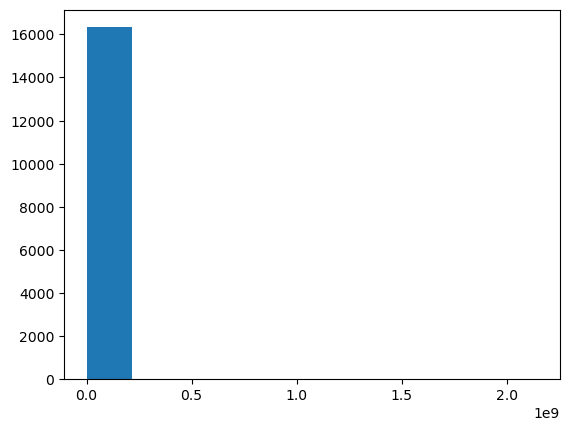

In [13]:
plt.figure()
plt.hist(df["Mileage"])
plt.show()

In [14]:
df["Mileage"].describe()

count    1.635100e+04
mean     1.495281e+06
std      4.814091e+07
min      0.000000e+00
25%      7.000000e+04
50%      1.259960e+05
75%      1.887330e+05
max      2.147484e+09
Name: Mileage, dtype: float64

In [15]:
df.drop(m.index, inplace=True)

In [16]:
m = df[df["Mileage"]==0]
print(m)

Empty DataFrame
Columns: [ID, Price, Levy, Manufacturer, Model, Prod. year, Category, Leather interior, Fuel type, Engine volume, Mileage, Cylinders, Gear box type, Drive wheels, Doors, Wheel, Color, Airbags]
Index: []


In [17]:
df["Levy"] = df["Levy"].replace("-", np.nan).astype(float)

- Levy의 결측치를 NaN 값으로 대체

In [19]:
df.count(axis=0, numeric_only=True)

ID            15730
Price         15730
Levy          11134
Prod. year    15730
Mileage       15730
Cylinders     15730
Doors         15730
Airbags       15730
dtype: int64

- Levy에서 11428개만 float. 
- Levy : 자동차 부과세

In [21]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()}개의 고유값. {df[col].unique()}")

ID: 15497개의 고유값. [44925464 45798509 45815373 ... 45648475 45805255 45793307]
Price: 2128개의 고유값. [14113 15681 31361 ...   450  7837 21109]
Levy: 509개의 고유값. [ 1185.   640.    nan   891.   629.   749.  1624.   394.   781.   836.
  2195.   830.   862.  1249.  1079.   475.   431.  1053.  1195.   531.
   779.   585.   915.  1058.   780.   639.   707.   753.   565.  1018.
   586.   308.   934.   831.  1077.  1017.   769.  1850.   761.  1750.
   584.  1514.   765.  2297.   650.   397.   503.   642.   247.  1202.
  1288.   645.  1055.  1996.   382.  1292.   474.   259.   971.   988.
  1324.   834.   271.  1141.  1811.  1866.   528.  1646.  1203.  1194.
   595.  1273.  2018.  1325.  1024.   518.  1277.  1282.   790.  4741.
   875.   687.   638.  1172.   521.   609.   986.   607.  1363.  1481.
  1266.   919.   742.   777.  1268.   690.  2455.   353.   530.   682.
  1664.   481.  1091.   502.   770.   880.   583.   490.   738.   730.
   900.   751.  2225.   966.  1714.  1236.   784.   893.  1308. 

In [22]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

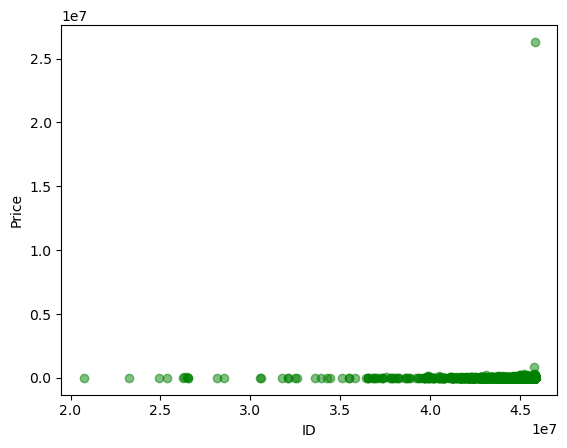

In [23]:
plt.figure()
plt.scatter(df["ID"], df["Price"], alpha=0.5, c="green")
plt.xlabel("ID")
plt.ylabel("Price")
plt.show()

- ID와 Price는 관계가 없어보임

In [25]:
df.drop(columns="ID", inplace=True)

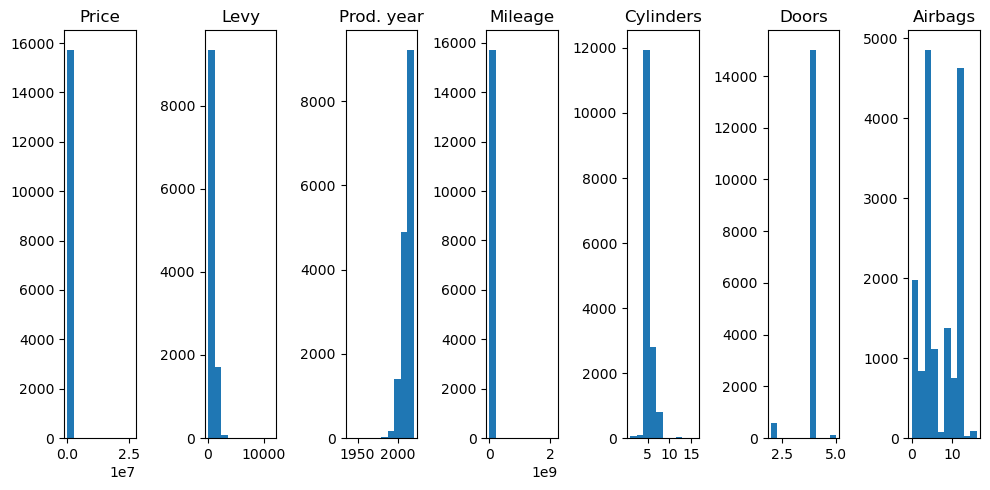

In [26]:
fig, axs = plt.subplots(1, 7, figsize=(10, 5))
col = ["Price", "Levy", "Prod. year", "Mileage", "Cylinders", "Doors", "Airbags"]
for i in range(len(col)):
    axs[i].hist(df[col[i]])
    axs[i].set_title(col[i])
plt.tight_layout()
plt.show()

- 전체적인 분포 확인
- 정규분포가 없으므로 Z score 적용 x
    - IQR로 이상치 처리

In [28]:
df["Price"].describe()

count    1.573000e+04
mean     1.916755e+04
std      2.105373e+05
min      1.000000e+00
25%      5.645000e+03
50%      1.348500e+04
75%      2.258000e+04
max      2.630750e+07
Name: Price, dtype: float64

In [29]:
df.groupby("Manufacturer")["Model"].unique()

Manufacturer
ACURA                          [TSX, RDX, MDX, TLX, TL saber, TL]
ALFA ROMEO                             [159, Giulietta, 166, 147]
ASTON MARTIN                                             [Virage]
AUDI            [A6, Q5, A4, A8, A7 Prestige, A4 premium, TT, ...
BENTLEY                                [Mulsanne, Continental GT]
                                      ...                        
VAZ             [2121 (Niva), 2103 03, 2107, 2106, 1111, Vesta...
VOLKSWAGEN      [T5, Passat SE, Jetta, Passat, Touareg, CC, Go...
VOLVO           [960, XC90, S70, V50, 940, XC90 2.5turbo, S60,...
ZAZ                                                    [969 luaz]
სხვა                                                      [GONOW]
Name: Model, Length: 64, dtype: object

In [30]:
df.groupby("Manufacturer")["Model"].value_counts()

Manufacturer  Model        
ACURA         TSX              3
              MDX              2
              TL               2
              RDX              1
              TL saber         1
                              ..
VOLVO         V50              1
              XC90 2.5turbo    1
              XC90 3.2 AWD     1
ZAZ           969 luaz         1
სხვა          GONOW            1
Name: count, Length: 1422, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder
df_levy = df.copy()
le=LabelEncoder()

for col in ["Manufacturer", "Model", "Category"]:
    df_levy[col + "_encoding"] = le.fit_transform(df[col])

- Levy 결측치를 무엇으로 대체할지 생각하기 위해 제조업체, 모델, 카테고리를 라벨 인코딩해서 상관관계 확인

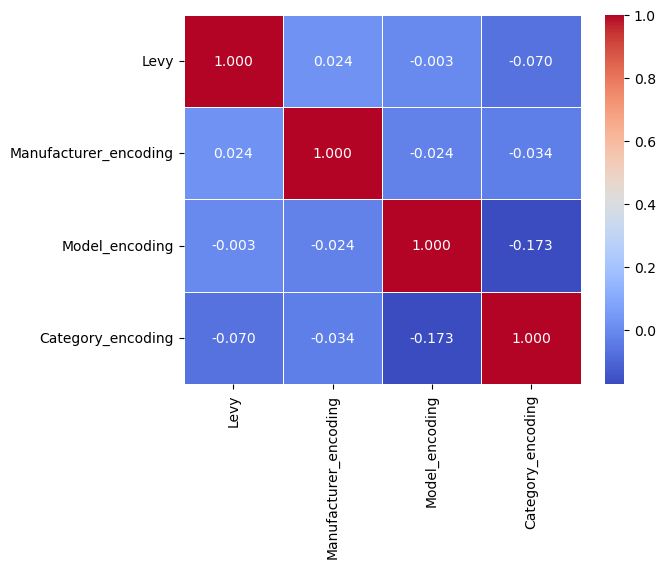

In [33]:
plt.figure()
cm = df_levy[["Levy", "Manufacturer_encoding", 
              "Model_encoding", "Category_encoding"]].corr()
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt = ".3f", linewidth=0.4)
plt.show()

- 카테고리, 제조업체, 모델 순으로 중요도 부여

1. 제조업체, 모델, 카테고리
2. 카테고리, 제조업체
3. 카테고리
4. 제조업체
5. 모델
순으로 평균 내서 채워줌

In [36]:
df["Turbo"] = df["Engine volume"].str.contains("Turbo").astype(int)
df["Engine volume"] = df["Engine volume"].str.replace(" Turbo", "").astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15730 entries, 0 to 16350
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             15730 non-null  int64  
 1   Levy              11134 non-null  float64
 2   Manufacturer      15730 non-null  object 
 3   Model             15730 non-null  object 
 4   Prod. year        15730 non-null  int64  
 5   Category          15730 non-null  object 
 6   Leather interior  15730 non-null  object 
 7   Fuel type         15730 non-null  object 
 8   Engine volume     15730 non-null  float64
 9   Mileage           15730 non-null  int64  
 10  Cylinders         15730 non-null  int64  
 11  Gear box type     15730 non-null  object 
 12  Drive wheels      15730 non-null  object 
 13  Doors             15730 non-null  int64  
 14  Wheel             15730 non-null  object 
 15  Color             15730 non-null  object 
 16  Airbags           15730 non-null  int64  
 17

- Engine volume에서 turbo가 붙은 경우를 따로 분리해서 0, 1로 표현
- df 확인시 Levy의 결측치가 전부 채워진 걸 알수있음

In [38]:

df["Levy"] = df["Levy"].replace("-", np.nan)
mask = df["Levy"].astype(str).str.replace("-", "").replace("", np.nan).notna()
df.loc[mask, "Levy"] = pd.to_numeric(df.loc[mask, "Levy"], errors="coerce")
df.loc[df["Levy"] > 0.2 * df["Price"], "Levy"] = "-"

df["Levy"] = pd.to_numeric(df["Levy"], errors="coerce")

fill_order = [["Manufacturer", "Model", "Category"],  
    ["Category", "Manufacturer"],          
    ["Category"], ["Manufacturer"], ["Model"]                       
]
for order in fill_order:
    levy_mean = df.groupby(order)["Levy"].transform("mean")
    df["Levy"] = df["Levy"].fillna(levy_mean)




C:\Users\82108\AppData\Local\Temp\ipykernel_162904\4007616002.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df["Levy"] > 0.2 * df["Price"], "Levy"] = "-"


In [39]:
df["Turbo"]

0        0
1        0
2        0
3        0
4        1
        ..
16346    0
16347    0
16348    0
16349    0
16350    0
Name: Turbo, Length: 15730, dtype: int32

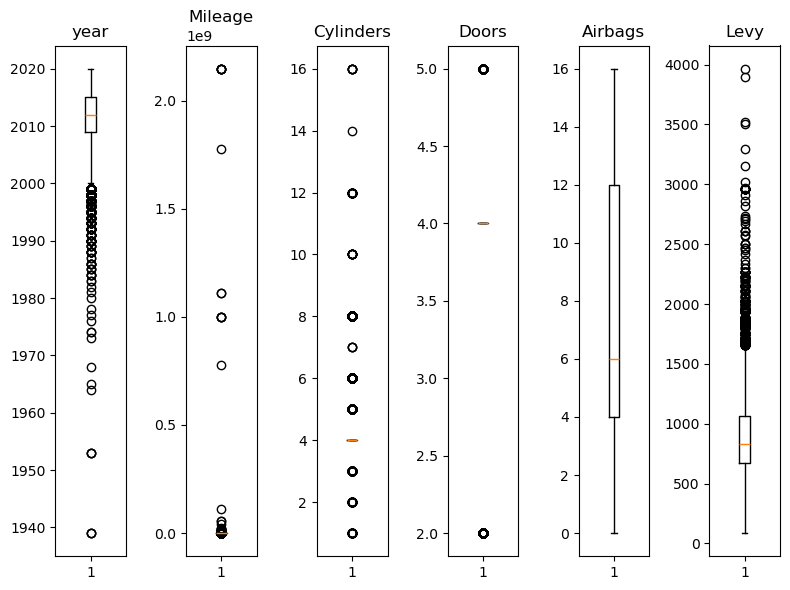

In [40]:
fig , axs = plt.subplots(1, 6, figsize=(8, 6))

axs[0].boxplot(df["Prod. year"]) 
axs[0].set_title("year")

axs[1].boxplot(df["Mileage"])
axs[1].set_title("Mileage")

axs[2].boxplot(df["Cylinders"])
axs[2].set_title("Cylinders")

axs[3].boxplot(df["Doors"])
axs[3].set_title("Doors")

axs[4].boxplot(df["Airbags"])
axs[4].set_title("Airbags")

axs[5].boxplot(df["Levy"])
axs[5].set_title("Levy")

plt.tight_layout()  
plt.show()

In [41]:
df.describe()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags,Turbo
count,1.573000e+04,15730.000000,15730.000000,15730.000000,1.573000e+04,15730.000000,15730.000000,15730.000000,15730.000000
mean,1.916755e+04,901.994366,2011.101844,2.306262,1.554312e+06,4.573045,3.930579,6.626764,0.099555
std,2.105373e+05,332.483962,5.449943,0.875594,4.908111e+07,1.191034,0.394200,4.307154,0.299415
min,1.000000e+00,87.000000,1939.000000,0.000000,1.800000e+01,1.000000,2.000000,0.000000,0.000000
25%,5.645000e+03,670.337793,2009.000000,1.800000,7.655450e+04,4.000000,4.000000,4.000000,0.000000
50%,1.348500e+04,833.000000,2012.000000,2.000000,1.300000e+05,4.000000,4.000000,6.000000,0.000000
75%,2.258000e+04,1062.879630,2015.000000,2.500000,1.906608e+05,4.000000,4.000000,12.000000,0.000000
max,2.630750e+07,3965.000000,2020.000000,20.000000,2.147484e+09,16.000000,5.000000,16.000000,1.000000


In [42]:
df["Prod. year"].value_counts()

Prod. year
2012    1801
2014    1762
2013    1621
2011    1312
2015    1285
2016    1258
2010    1242
2017     780
2008     609
2009     496
2018     426
2007     386
2005     312
2004     289
2003     269
2019     253
2006     250
2002     239
2000     216
2001     191
1998     154
1999     149
1997     101
1996      88
1995      75
2020      35
1994      28
1992      21
1993      15
1990      13
1988       8
1991       8
1986       5
1989       4
1984       4
1953       3
1939       3
1985       3
1983       2
1987       2
1974       2
1965       1
1977       1
1980       1
1981       1
1982       1
1968       1
1978       1
1973       1
1964       1
1976       1
Name: count, dtype: int64

In [43]:
df["Mileage"].value_counts(ascending=True)

Mileage
143131      1
168044      1
58221       1
111875      1
129123      1
         ... 
160000    101
100000    103
180000    107
150000    127
200000    152
Name: count, Length: 6826, dtype: int64

In [44]:
df["Airbags"].unique()

array([ 8,  4,  2,  6, 12,  0, 10,  5,  7, 11, 16,  9,  1, 15, 14,  3, 13],
      dtype=int64)

In [45]:
df["Wheel"].unique()

array(['Left wheel', 'Right-hand drive'], dtype=object)

In [46]:
df["Doors"].unique()

array([4, 2, 5], dtype=int64)

In [47]:
df["Cylinders"].unique()

array([ 4,  6,  8,  5,  2,  3, 12,  1, 14,  7, 10, 16], dtype=int64)

- Airbags, Wheel, Doors, Cylinders 는 이상치 처리로 넘기기 어려움
    - unique한 개수가 적어서 이상치로 판단하기 힘듦

In [49]:
cylinder_ranges = {
    "Sedan": (3, 12),
    "Jeep": (3, 12),
    "Hatchback": (3, 12),
    "Minivan": (3, 12),
    "Coupe": (3, 12),
    "Universal": (3, 12),
    "Microbus": (3, 12),
    "Goods wagon": (3, 12),
    "Pickup": (3, 12),
    "Cabriolet": (3, 12),
    "Limousine": (3, 12),
}

# 각 카테고리별 실린더 범위 내로 값 보정
for category, (min_cyl, max_cyl) in cylinder_ranges.items():
    mask = df["Category"] == category

    df.loc[mask & (df["Cylinders"] < min_cyl), "Cylinders"] = min_cyl
    df.loc[mask & (df["Cylinders"] > max_cyl), "Cylinders"] = max_cyl

print("✅ df에서 실린더 개수 범위 조정 완료!")

✅ df에서 실린더 개수 범위 조정 완료!


In [50]:
# Cylinder volume 계산
df['Cylinder volume'] = np.where(
    df['Cylinders'] != 0,
    df['Engine volume'] / df['Cylinders'],
    np.nan
)

# 로그 변환 (0 방지 위해 log1p 사용)
log_cyl_vol = np.log1p(df['Cylinder volume'])

# IQR 계산
Q1 = log_cyl_vol.quantile(0.25)
Q3 = log_cyl_vol.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound (log space): {lower_bound}")
print(f"Upper bound (log space): {upper_bound}")

# 이상치 마스킹: 로그 변환된 값이 IQR 밖인 경우 제거
mask = (log_cyl_vol >= lower_bound) & (log_cyl_vol <= upper_bound)
df = df[mask].copy()
df=df.drop(columns='Cylinder volume')

Lower bound (log space): 0.1814682416028791
Upper bound (log space): 0.6263707820437768


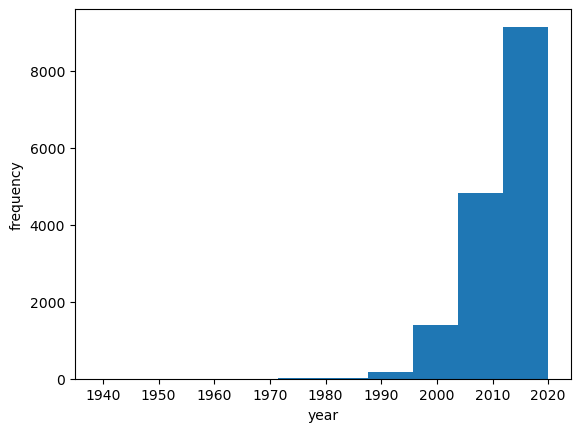

In [51]:
plt.figure()
plt.hist(df["Prod. year"])
plt.xlabel("year")
plt.ylabel("frequency")
plt.show()

- 2010 ~ 2020 사이에 높은 분포

In [53]:
#마일리지 자체보다 연간 마일리지에 집중 2020은 가장 최신 중고차가 2020년이라 선택(함수화 가능)
df["Age"] = 2020 - df["Prod. year"]
df["Mileage_per_year"] = df["Mileage"] / df["Age"].replace(0, np.nan)

C:\Users\82108\AppData\Local\Temp\ipykernel_162904\3483135770.py:10: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\82108\AppData\Local\Temp\ipykernel_162904\3483135770.py:10: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\82108\AppData\Local\Temp\ipykernel_162904\3483135770.py:10: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\82108\AppData\Local\Temp\ipykernel_162904\3483135770.py:10: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\82108\AppData\Local\Temp\ipykernel_162904\3483135770.py:10: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\82108\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) m

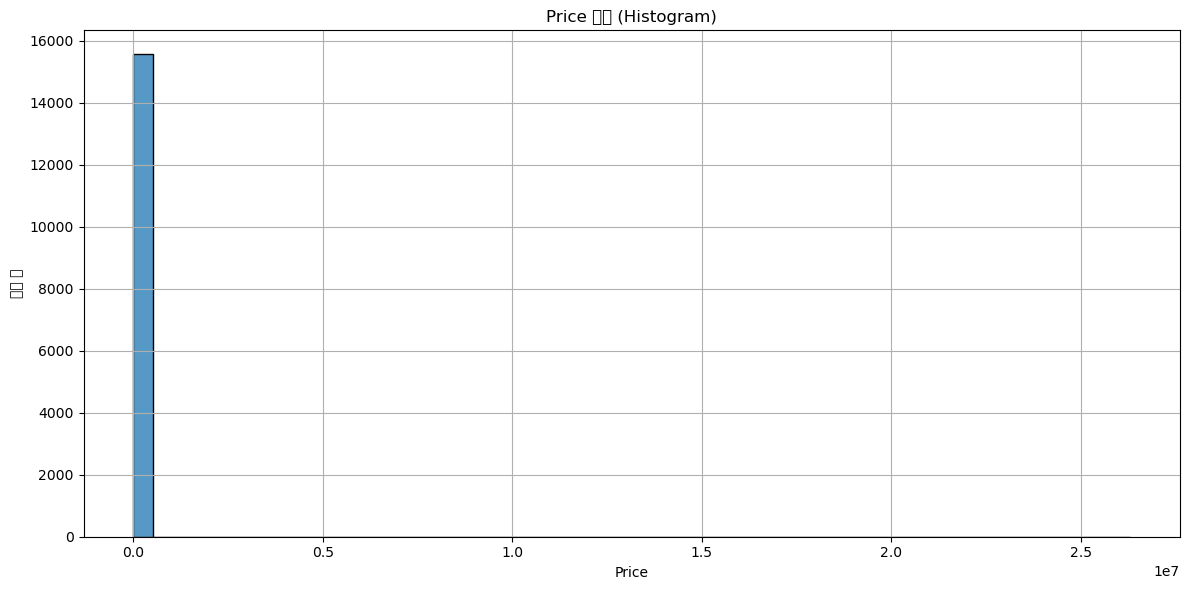

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df["Price"], bins=50, kde=False)
plt.title("Price 분포 (Histogram)")
plt.xlabel("Price")
plt.ylabel("차량 수")
plt.grid(True)
plt.tight_layout()
plt.show()


In [55]:
# 2. 이상치 함수
def outlier(data, col, weight=1.5):
    q1 = np.percentile(data[col].dropna(), 25)
    q3 = np.percentile(data[col].dropna(), 75)
    IQR = (q3 - q1) * weight
    low = q1 - IQR
    high = q3 + IQR
    out_idx = data[(data[col] < low) | (data[col] > high)].index
    return out_idx

# 3. Category별 연간 주행거리 이상치 제거
total_outliers = []
for category in df["Category"].unique():
    sub_df = df[df["Category"] == category]
    out_idx = outlier(sub_df, "Mileage_per_year")
    total_outliers.extend(out_idx)

df.drop(index=total_outliers, inplace=True)
df.reset_index(drop=True, inplace=True)

# 4. Prod. year 이상치 제거
out_idx = outlier(df, "Prod. year")
df.drop(index=out_idx, inplace=True)
df.reset_index(drop=True, inplace=True)


2011년식 ,모닝 168,696km 기준 139만 원(https://auto.danawa.com/usedcar/?Tab=list&Model=2132)
국산 자동차는 10만km, 15만km 정도의 주행거리가 보통 수명
최소한의 이상치만 제거하기 위해 100만원(=680달러)
근사치인 650달러를 이하는 이상치라고 생각하고 제거

C:\Users\82108\AppData\Local\Temp\ipykernel_162904\3001563646.py:27: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\82108\AppData\Local\Temp\ipykernel_162904\3001563646.py:27: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\82108\AppData\Local\Temp\ipykernel_162904\3001563646.py:27: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\82108\AppData\Local\Temp\ipykernel_162904\3001563646.py:27: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\82108\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82108\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54620 (

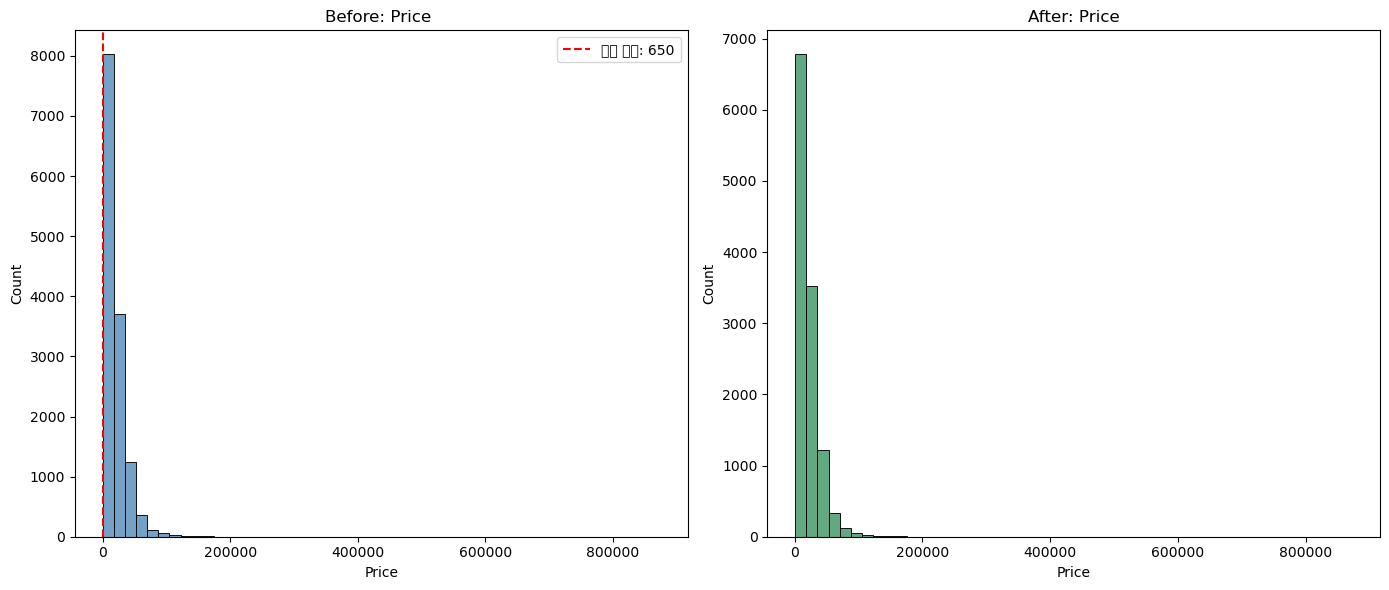

(650): 1484


In [57]:
# 1. 하한 기준 설정 
lower_price_threshold = 650  # 또는 50, 10 등 실험 가능

# 2. 하단 이상치 제거
df_trimmed = df[df["Price"] >= lower_price_threshold].copy()

# 3. 시각화 (이전 코드와 동일)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df["Price"], bins=50, color='steelblue')
plt.axvline(lower_price_threshold, color="red", linestyle="--", label=f"하한 기준: {lower_price_threshold}")
plt.title("Before: Price ")
plt.xlabel("Price")
plt.ylabel("Count")
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(df_trimmed["Price"], bins=50, color='seagreen')
plt.title("After: Price")
plt.xlabel("Price")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

# 제거 수 출력
removed_count = df.shape[0] - df_trimmed.shape[0]
print(f"하한선: ${lower_bound}, 상한선(IQR): ${round(upper_bound, 2)}")
print(f"제거 전 데이터 수: {len(df)}")
print(f"제거 후 데이터 수: {len(df_cleaned)}")
print(f"제거된 데이터 수: {len(df) - len(df_cleaned)}")


위 Price 그래프를 보면, 아래쪽에 값이 많이 깔려있기 때문에 IQR방식을 직접쓰기에는 부적합하다고 생각함.
Category 별로 일정한 Price 분포가 존재할 것이라고 가정하고, 아래 Category별 Price 박스플롯을 그려봄

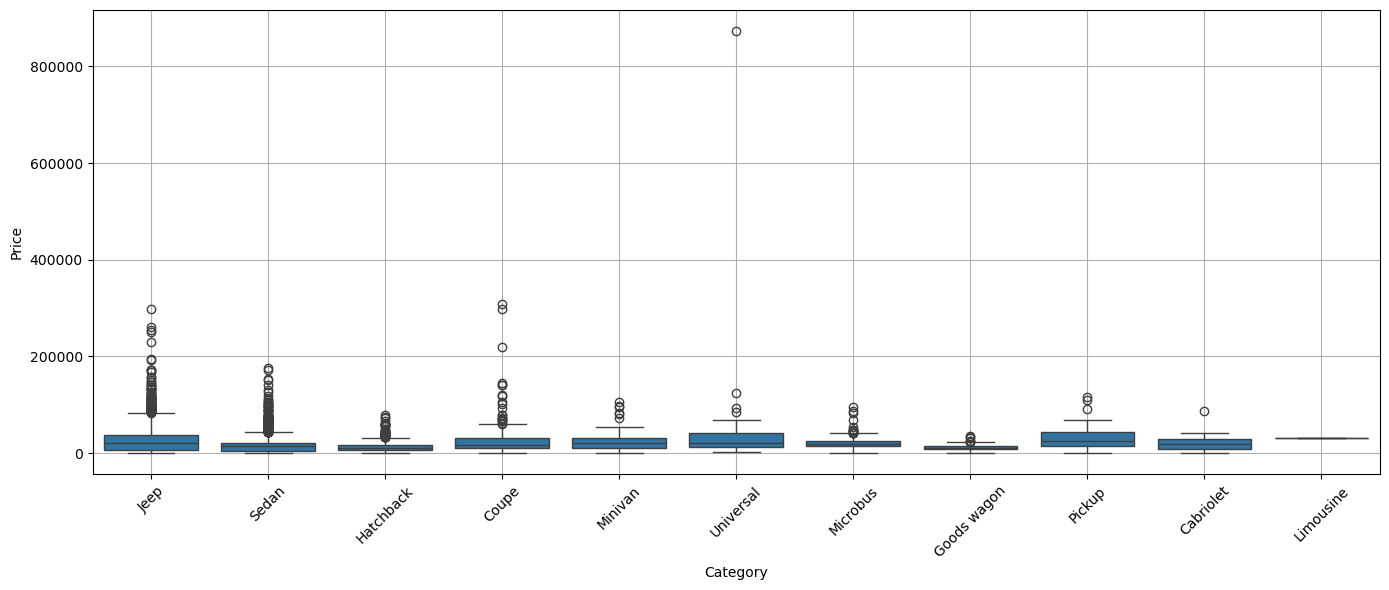

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x="Category", y="Price")
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


Category 별로 값이 잘 모여있기 때문에, Category별로 IQR 방식으로 Price 이상치를 제거 

In [61]:
# 복사본 생성
df_filtered = df.copy()

# 결과 담을 리스트
outlier_indices = []

# 각 Category별로 상하한 계산 후 이상치 인덱스 수집
for category in df_filtered["Category"].unique():
    sub_df = df_filtered[df_filtered["Category"] == category]
    Q1 = sub_df["Price"].quantile(0.25)
    Q3 = sub_df["Price"].quantile(0.75)
    IQR = Q3 - Q1
    
    # 너무 과도하지 않도록 완화된 범위 (1.5 대신 2.0 사용)
    lower = Q1 - 2.0 * IQR
    upper = Q3 + 2.0 * IQR
    
    outlier_idx = sub_df[(sub_df["Price"] < lower) | (sub_df["Price"] > upper)].index
    outlier_indices.extend(outlier_idx)

# 이상치 제거
df_filtered.drop(index=outlier_indices, inplace=True)
df_filtered.reset_index(drop=True, inplace=True)

# 결과 요약
print(f"제거된 이상치 수: {len(outlier_indices)}")
print(f"최종 데이터 수: {len(df_filtered)}")


제거된 이상치 수: 305
최종 데이터 수: 13281


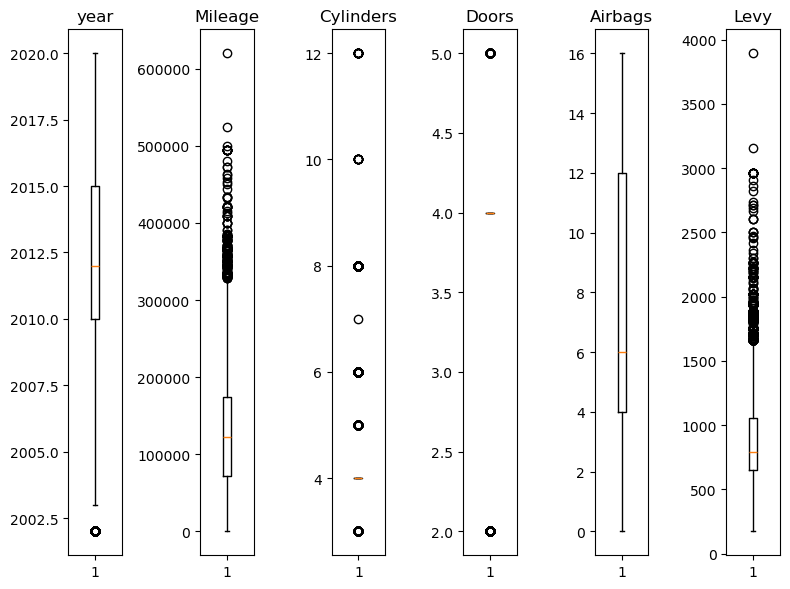

In [62]:
fig , axs = plt.subplots(1, 6, figsize=(8, 6))

axs[0].boxplot(df["Prod. year"]) 
axs[0].set_title("year")

axs[1].boxplot(df["Mileage"])
axs[1].set_title("Mileage")

axs[2].boxplot(df["Cylinders"])
axs[2].set_title("Cylinders")

axs[3].boxplot(df["Doors"])
axs[3].set_title("Doors")

axs[4].boxplot(df["Airbags"])
axs[4].set_title("Airbags")

axs[5].boxplot(df["Levy"])
axs[5].set_title("Levy")

plt.tight_layout()  
plt.show()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13586 entries, 0 to 13585
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13586 non-null  int64  
 1   Levy              13586 non-null  float64
 2   Manufacturer      13586 non-null  object 
 3   Model             13586 non-null  object 
 4   Prod. year        13586 non-null  int64  
 5   Category          13586 non-null  object 
 6   Leather interior  13586 non-null  object 
 7   Fuel type         13586 non-null  object 
 8   Engine volume     13586 non-null  float64
 9   Mileage           13586 non-null  int64  
 10  Cylinders         13586 non-null  int64  
 11  Gear box type     13586 non-null  object 
 12  Drive wheels      13586 non-null  object 
 13  Doors             13586 non-null  int64  
 14  Wheel             13586 non-null  object 
 15  Color             13586 non-null  object 
 16  Airbags           13586 non-null  int64 

In [64]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ["Manufacturer", "Model", "Category", "Leather interior", "Fuel type", 
                    "Gear box type", "Drive wheels", "Wheel", "Color"]

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col + "_encoded"] = le.fit_transform(df[col])
    label_encoders[col] = le  

numeric_features = df.select_dtypes(include=["int64", "float64"])


corr_matrix = numeric_features.corr()
print(corr_matrix["Price"].sort_values(ascending=False))

Price               1.000000
Prod. year          0.283761
Levy                0.152355
Engine volume       0.115510
Cylinders           0.113353
Doors              -0.020774
Airbags            -0.052871
Mileage_per_year   -0.054098
Mileage            -0.241793
Age                -0.283761
Name: Price, dtype: float64


- Price와 다른 컬럼들의 상관관계 확인

## XGBoost 모델학습

In [67]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


feature = ["Prod. year", "Turbo", "Engine volume", "Gear box type_encoded", 
            "Fuel type_encoded", "Airbags", "Wheel_encoded", "Mileage",
          "Drive wheels_encoded", "Model_encoded"]

df_copy = df.copy()
x = df_copy[feature]
y = df_copy["Price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=22)

In [68]:
# 모델 학습
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [69]:
from sklearn.metrics import mean_squared_error

y_pred = xgb.predict(x_test)
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse)
print(f"XGBoost RMSE: {rmse:.4f}")

XGBoost RMSE: 9251.5480


In [70]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"XGBoost R² Score: {r2:.4f}")

XGBoost R² Score: 0.7438


## 하이퍼 파라미터 조정

In [72]:
from sklearn.model_selection import RandomizedSearchCV

param = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param,
                                   scoring='neg_mean_squared_error', cv = 3, 
                                   n_iter=20, n_jobs=-1, random_state=42)

random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.3],
                                        'max_depth': [3, 6, 9],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 300, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

- RandomGridCV 하기에 조합이 너무 많아서 시간이 오래걸림

In [74]:
random_search.best_params_

{'subsample': 0.8,
 'n_estimators': 300,
 'min_child_weight': 3,
 'max_depth': 9,
 'learning_rate': 0.1,
 'colsample_bytree': 0.6}

In [75]:
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"XGBoost RMSE: {rmse:.4f}")

XGBoost RMSE: 8851.5893


In [76]:

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"XGBoost R² Score: {r2:.4f}")

XGBoost R² Score: 0.7655


# test 데이터에 적용

In [78]:
test_df = pd.read_csv("./Data/test.csv")

In [79]:
test_df["Turbo"] = test_df["Engine volume"].str.contains("Turbo").astype(int)
test_df["Engine volume"] = test_df["Engine volume"].str.replace(" Turbo", "").astype(float)

In [80]:
test_df["Mileage"] = test_df["Mileage"].map(lambda x : int(x[:-3]))


In [81]:
test_df['Levy'] = pd.to_numeric(test_df['Levy'], errors='coerce')



In [82]:
for col in ["Manufacturer", "Model", "Category", "Leather interior", "Fuel type", 
                    "Gear box type", "Drive wheels", "Wheel", "Color"]:
    le = label_encoders[col]
    test_df[col + "_encoded"] = test_df[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

In [83]:
x_test_col = test_df[["Prod. year", "Turbo", "Engine volume", "Gear box type_encoded", 
            "Fuel type_encoded", "Airbags", "Wheel_encoded", "Mileage",
          "Drive wheels_encoded", "Model_encoded"]]

In [84]:
y_pred_test = best_xgb.predict(x_test_col)

In [85]:
submission = pd.DataFrame({
    "ID": test_df["ID"],  
    "Price": y_pred_test
})

submission.to_csv("submission55.csv", index=False)

In [86]:
test_df = pd.read_csv("./Data/test.csv")
print("원본 test.csv 행 수:", len(test_df))

원본 test.csv 행 수: 500


In [87]:
submission = pd.read_csv("submission.csv")
print("제출 파일 행 수:", len(submission))


제출 파일 행 수: 500


In [88]:
missing_ids = set(test_df["ID"]) - set(submission["ID"])
print("누락된 ID 수:", len(missing_ids))

누락된 ID 수: 0
